## Clasificación de Dígitos Manuscritos por medio de una CNN

## Librerías y dataset (mnist)

El **mnist** es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la Clasificación de los dígitos escritos a mano, disponible en keras.

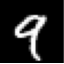
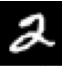
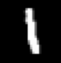

## Carga de imágenes y librerias

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import itertools
import math
import os
from sklearn.metrics import confusion_matrix
from skimage import io 
from skimage.transform import rescale, resize, downscale_local_mean
from random import randint, choice, choices
from tensorflow import keras
from PIL import Image
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import cv2
from tqdm import tqdm
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Tamaño del Dataset

In [2]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_Valid:  '  + str(X_valid.shape))
print('Y_Valid:  '  + str(Y_valid.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_Valid:  (10000, 28, 28)
Y_Valid:  (10000,)


**Tamaño de datasets de entrenamiento y prueba (85,7 % y 14,28 %)**

In [3]:
X_train = X_train/255 
X_valid = X_valid/255 

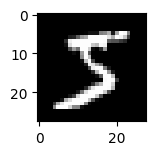

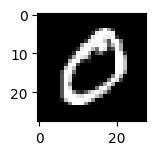

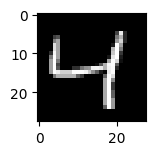

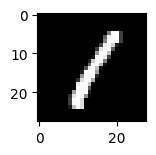

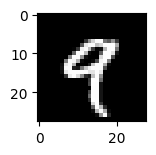

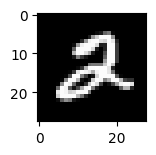

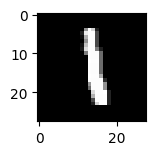

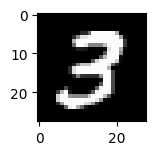

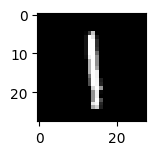

In [4]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [5]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_Valid:  '  + str(X_valid.shape))
print('Y_Valid:  '  + str(Y_valid.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_Valid:  (10000, 28, 28)
Y_Valid:  (10000,)


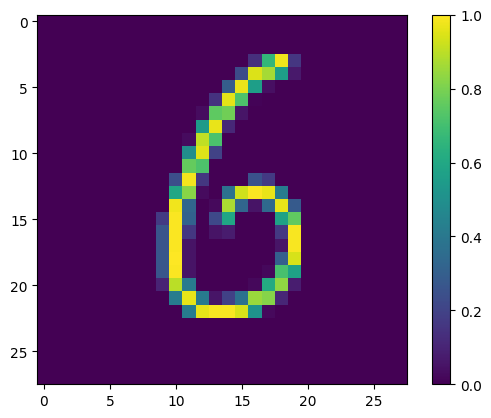

In [6]:
plt.figure()
plt.imshow(X_train[18])
plt.colorbar()
plt.grid(False)
plt.show()

## Clases

In [7]:
names=['numero 0','numero 1','numero 2','numero 3','numero 4','numero 5',
'numero 6','numero 7','numero 8','numero 9']
print(len(names))

10


## Dimensión de las imágenes. Las imagenes tienen un tamaño de 28*28 pixeles, como son en blanco y negro tenemos 1 solo canal de color.

In [8]:
X_train.shape

(60000, 28, 28)

## CNN para el reconocimiento de dígitos manuscritos

## Es una CNN de 9 capas, 1 de entrada, 6 capas intermedias y 2 densas.

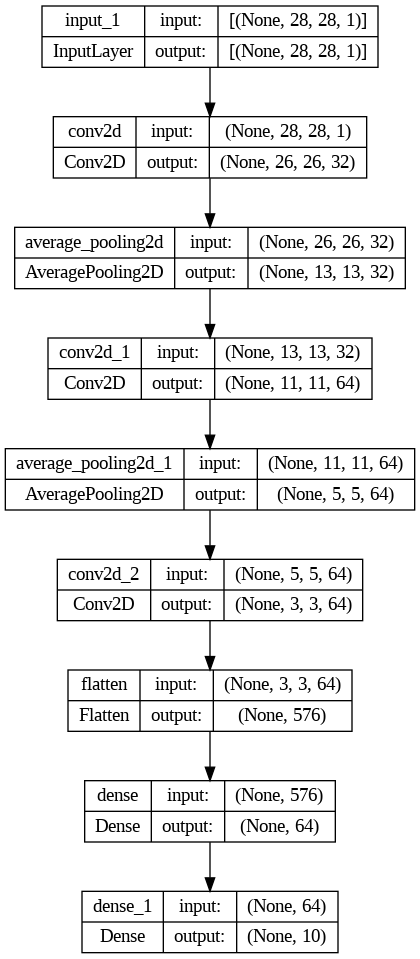

In [9]:
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),      
    #Caracterizacion de las imagenes
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'), 
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),   


    #Etapa de clasificacion
    keras.layers.Flatten(),     #Aplanar los datos a un vector unidimensional
    keras.layers.Dense(64, activation=tf.nn.relu),#Implementza la operación f(z)
    
    keras.layers.Dense(len(names), activation=tf.nn.softmax)
])
tf.keras.utils.plot_model(model_CNN, show_shapes=True)

## Resumen de la CNN

In [10]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 13, 13, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Compilación del Modelo

In [ ]:
model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Relu: Da mejores resultados de exactitud
print("RELU")
history_relu = model_CNN.fit(X_train,Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=12)
print("======")

RELU
Epoch 1/12
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1825 - accuracy: 0.9446 - val_loss: 0.0527 - val_accuracy: 0.9831
Epoch 2/12
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 3/12
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0397 - val_accuracy: 0.9869
Epoch 4/12
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0294 - val_accuracy: 0.9910
Epoch 5/12
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0285 - val_accuracy: 0.9910
Epoch 6/12
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 7/12
1861/1875 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9950

## Se realizan 12 epochs, con muy buenos valores de exactitud para el modelo de  CNN

## Graficos de Exactitud para Entrenamiento y Validación

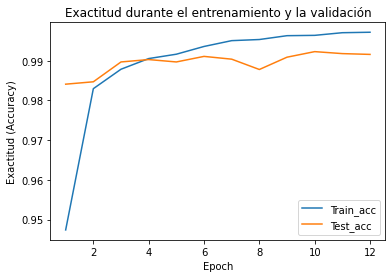

In [ ]:
history_dict=history_relu.history
epochs = range(1, len(history_dict["accuracy"]) + 1)

plt.plot(epochs, history_dict["accuracy"])
plt.plot(epochs, history_dict["val_accuracy"])
plt.legend(["Train_acc", "Test_acc"])
plt.xlabel("Epoch")
plt.ylabel("Exactitud (Accuracy)")
plt.title("Exactitud durante el entrenamiento y la validación")
plt.show()

## Nuestro modelo de CNN no se ve afectado por el overfitting.

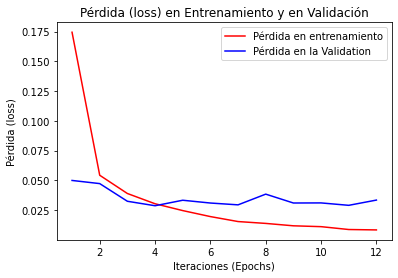

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss_values, 'b', label='Pérdida en la Validation')
plt.title('Pérdida (loss) en Entrenamiento y en Validación')
plt.xlabel('Iteraciones (Epochs)')
plt.ylabel('Pérdida (loss)')
plt.legend()
plt.show()

## Es necesario balancear?

In [ ]:
class_weights = compute_class_weight(class_weight="balanced", 
                                     classes=(0,1,2,3,4,5,6,7,8,9),   #Levels de los labels usados.
                                     y=Y_train) 

In [ ]:
class_weights

array([1.01300017, 0.88994364, 1.00704935, 0.97863318, 1.02704553,
       1.10680686, 1.01385603, 0.95770152, 1.02546573, 1.00857287])

## *Viendo los pesos, podemos concluir que no es necesario balancear*

## Uso de callbacks

## Librerias necesarias
Importamos las librerias necesarias para el uso de callbacks

In [ ]:
from pathlib import Path
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

def create_callbacks(output_dirs, model_name, stopping_patience, lr_patience, initial_lr):

    for output_dir in output_dirs.values():

        Path(output_dir).mkdir(parents=True, exist_ok=True)

    csv_logger = CSVLogger(os.path.join(output_dirs["/training_metrics"], f"{model_name}.csv"))
    early_stopping = EarlyStopping(patience=stopping_patience, verbose=1, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(os.path.join(output_dirs["/models"], f"{model_name}.hdf5"),
        verbose=1,
        save_best_only=True
    )

    # Reduce la tasa de aprendizaje a la mitad (como máximo 5 veces) en caso de no haber 
    # mejora durante varios "epochs".
    reduce_lr = ReduceLROnPlateau(factor=0.5, patience=lr_patience, min_lr=initial_lr * (0.5 ** 5))

    timestamp = datetime.datetime.now().strftime("%d%m%Y_%H%M%S")
    tensorboard = TensorBoard(
        os.path.join(output_dirs["/tensorboard_logs"], f'{model_name}_{timestamp}'),
        histogram_freq=1,
        write_images=True,
        write_steps_per_second=True,
        profile_batch=(10, 20)
    )

## Definicion de callbacks

In [ ]:
OUTPUT_DIRS = {
    
    "/training_metrics": ".content/drive/MyDrive/IA/training_metrics",
    "/models": ".content/drive/MyDrive/IA/models",
    "/tensorboard_logs": ".content/drive/MyDrive/IA/tensorboard_logs"
}

MODEL_NAME = "model_ClassDigits"     
STOPPING_PATIENCE = 16  
LR_PATIENCE = 8 
INITIAL_LR = 0.0001

callbacks = create_callbacks(OUTPUT_DIRS, MODEL_NAME, STOPPING_PATIENCE,
                             LR_PATIENCE, INITIAL_LR)

In [ ]:
names=['numero 0','numero 1','numero 2','numero 3','numero 4','numero 5',
'numero 6','numero 7','numero 8','numero 9']

#Uso del callback y balanceo
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),     
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  
    keras.layers.AveragePooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),   

    #Etapa de clasificacion
    keras.layers.Flatten(),     
    keras.layers.Dense(64, activation=tf.nn.relu),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(len(names), activation=tf.nn.softmax)
])
tf.keras.utils.plot_model(model_CNN, show_shapes=True)

model_CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Relu: Da mejores resultados de exactitud en este caso.
history_relu = model_CNN.fit(X_train,Y_train,
                    validation_data=(X_valid, Y_valid),
                    class_weight=dict(enumerate(class_weights)),    
                    callbacks=callbacks,        
                    epochs=9)

Epoch 1/9
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1789 - accuracy: 0.9465 - val_loss: 0.0778 - val_accuracy: 0.9729
Epoch 2/9
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0544 - accuracy: 0.9829 - val_loss: 0.0474 - val_accuracy: 0.9840
Epoch 3/9
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0291 - val_accuracy: 0.9908
Epoch 4/9
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0326 - val_accuracy: 0.9897
Epoch 5/9
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0262 - val_accuracy: 0.9910
Epoch 6/9
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0274 - val_accuracy: 0.9912
Epoch 7/9
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0313 - val_ac

## *Usar callbacks redujo el número de epochs necesarios para compilar la red neuronal, esto es buen indicio ya que ahorramos tiempo y recursos.*

In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
history_dict=history_relu.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Primeros 10 números de prueba**

In [ ]:
print(y_test[0:10])

[7 2 1 0 4 1 4 9 5 9]


In [ ]:
predictions = model_CNN.predict(x_test)
pruebas = range(10)
print("predicciones:")
for i in pruebas:
  print(np.argmax(predictions[i]))
print("valores reales:")
for i in pruebas:
  print(y_test[i])

313/313 [==============================] - 6s 18ms/step
predicciones:
7
2
1
0
4
1
4
9
5
9
valores reales:
7
2
1
0
4
1
4
9
5
9


## Reporte de Métricas (precisión, sensibilidad, f1-score, exactitud)

In [ ]:
decoded_y_test = y_test
decoded_predictions = predictions.argmax(axis=1)
 
# Cálculo del reporte de clasificación
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
print(f'Reporte de clasificación:')
print(classification_report(decoded_y_test,
                            decoded_predictions))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Cálculo métrica f1-*score*

In [ ]:
# Cálculo de F1
print(f'F1-micro: {f1_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'F1-macro: {f1_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'F1-weighted: {f1_score(decoded_y_test, decoded_predictions, average="weighted")}')
 
print(f'F1 por clase:')
print('----')
f1_score_per_class = f1_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(10), f1_score_per_class):
    print(f'\t - F1 para la clase {label}: {score}')
print('----')

F1-micro: 0.9924
F1-macro: 0.9923281096655667
F1-weighted: 0.992400131987305
F1 por clase:
----
	 - F1 para la clase 0: 0.9918450560652395
	 - F1 para la clase 1: 0.9951648351648352
	 - F1 para la clase 2: 0.992721979621543
	 - F1 para la clase 3: 0.9906265416872225
	 - F1 para la clase 4: 0.9943906170321265
	 - F1 para la clase 5: 0.9893438025799215
	 - F1 para la clase 6: 0.9926701570680627
	 - F1 para la clase 7: 0.9946627850557982
	 - F1 para la clase 8: 0.9917269906928644
	 - F1 para la clase 9: 0.9901283316880553
----


## Cálculo de la métrica Precisión

In [ ]:
# Cálculo de precision
print(f'Precision (micro): {precision_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Precision (macro): {precision_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Precision (weighted): {precision_score(decoded_y_test, decoded_predictions, average="weighted")}')
 
print(f'Precision por clase:')
print('----')
precision_score_per_class = precision_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(10), precision_score_per_class):
    print(f'\t - Precision para la clase {label}: {score}')
print('----')

Precision (micro): 0.9924
Precision (macro): 0.9924263317366945
Precision (weighted): 0.9924212101968618
Precision por clase:
----
	 - Precision para la clase 0: 0.9908350305498982
	 - Precision para la clase 1: 0.9929824561403509
	 - Precision para la clase 2: 0.9941690962099126
	 - Precision para la clase 3: 0.9872173058013766
	 - Precision para la clase 4: 0.9959141981613892
	 - Precision para la clase 5: 0.98989898989899
	 - Precision para la clase 6: 0.9957983193277311
	 - Precision para la clase 7: 0.9922555663117134
	 - Precision para la clase 8: 0.9989583333333333
	 - Precision para la clase 9: 0.9862340216322517
----


## Cálculo de la métrica Sensibilidad (Recall)

In [ ]:
# Cálculo de recall
print(f'Recall (micro): {recall_score(decoded_y_test, decoded_predictions, average="micro")}')
print(f'Recall (macro): {recall_score(decoded_y_test, decoded_predictions, average="macro")}')
print(f'Recall (weighted): {recall_score(decoded_y_test, decoded_predictions, average="weighted")}')
 
print(f'Recall por clase:')
print('----')
recall_score_per_class = recall_score(decoded_y_test, decoded_predictions, average=None)
for label, score in zip(range(10), recall_score_per_class):
    print(f'\t - Recall para la clase {label}: {score}')
print('----')

Recall (micro): 0.9924
Recall (macro): 0.9922509781213327
Recall (weighted): 0.9924
Recall por clase:
----
	 - Recall para la clase 0: 0.9928571428571429
	 - Recall para la clase 1: 0.9973568281938326
	 - Recall para la clase 2: 0.9912790697674418
	 - Recall para la clase 3: 0.994059405940594
	 - Recall para la clase 4: 0.9928716904276986
	 - Recall para la clase 5: 0.9887892376681614
	 - Recall para la clase 6: 0.9895615866388309
	 - Recall para la clase 7: 0.9970817120622568
	 - Recall para la clase 8: 0.9845995893223819
	 - Recall para la clase 9: 0.9940535183349851
----


## Cálculo de la Exactitud del Modelo de CNN

In [ ]:
# Cálculo de accuracy
print(f'Exactitud (accuracy): {accuracy_score(decoded_y_test, decoded_predictions)}')

Exactitud (accuracy): 0.9924


## Matriz de Confusión

In [ ]:
import tensorflow as tf
matrix = tf.math.confusion_matrix(decoded_y_test, decoded_predictions, num_classes=10, weights=None, dtype=tf.dtypes.int32, name=None)
print(matrix)

tf.Tensor(
[[ 973    1    1    0    1    0    0    2    1    1]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   0    2 1023    2    0    0    2    3    0    0]
 [   1    0    3 1004    0    2    0    0    0    0]
 [   0    0    0    0  975    0    0    0    0    7]
 [   2    0    0    6    0  882    1    1    0    0]
 [   3    2    0    1    0    3  948    0    0    1]
 [   0    2    0    0    0    0    0 1025    0    1]
 [   3    1    2    3    0    2    0    0  959    4]
 [   0    0    0    0    3    2    0    1    0 1003]], shape=(10, 10), dtype=int32)
